# Quantum Circuit Identities

Gavin E. Crooks

2019-03-08

This notebook illustrates various identities between quantum circuits, using `QuantumFlow`, a toolkit for developing and exporing quantum algorithm on gate-model quantum computer. 

 (see https://quantumflow.readthedocs.io/en/latest/, https://github.com/gecrooks/quantumflow)

In [1]:
import quantumflow as qf
import numpy as np
from IPython.display import Image, display, HTML

## Creating and displaying circuits, and verifing circuit identities

Lets create a simple 2-qubit quantum circuit, and display it.

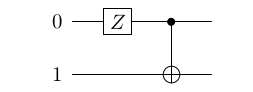

In [2]:
circ0 = qf.Circuit()
circ0 += qf.Z(0)            # Z gate on qubit 0
circ0 += qf.CNOT(0, 1)      # Controlled not gate: control is qubit 0, target is qubit 1
qf.circuit_to_image(circ0)  # Convert circuit to LaTex, then to PNG image

We can commute a Z gate past the control of a CNOT gate, so the following circuit is equivalent to the previous circuit.

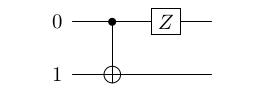

In [3]:
circ1 = qf.Circuit()
circ1 += qf.CNOT(0, 1)      # Controlled not gate: control is qubit 0, target is qubit 1
circ1 += qf.Z(0)            # Hadamard gate on qubit 0
qf.circuit_to_image(circ1)

Let's prove that statment. We can convert a circuit into the equivelent unitary gate with the `Circuit.asgate()` method, and then measure distances between gates using the Fubini-Study angle. This is a metric distance, and thus zero if and only if the gates (and therefore the original circuits) are identical (Up to phase difference, which does not matter physically).

In [4]:
qf.gate_angle(circ0.asgate(), circ1.asgate())

0.0

The `gates_close()` method returns true if the gates are (almost) equivalent, as measured by the gate angle.

In [7]:
qf.gates_close(circ0.asgate(), circ1.asgate())

True

## Simple circuit identities
The QuantumFlow examples directory contains a selection of such circuit identities. Let's verify and display these circuit interelations.

Hadamard is own inverse


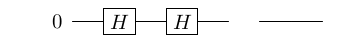

Hadamards convert X to Z


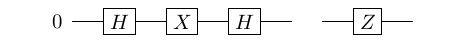

Hadamards convert Z to X


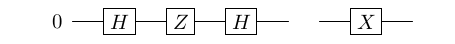

S sandwich converts X to Y


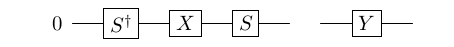

S sandwich converts Y to X


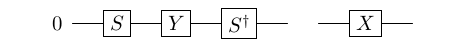

Hadamards convert RZ to RX


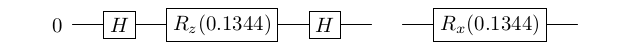

Hadamard ZYZ decomposition


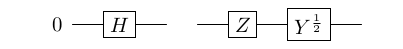

CZ to CNOT


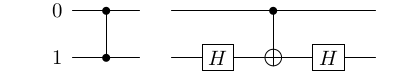

SWAP to 3 CNOTs


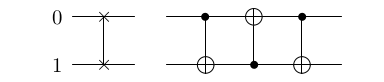

SWAP to 3 CZs


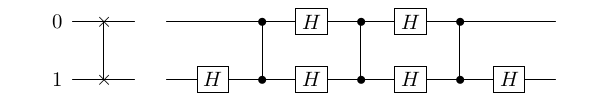

ISWAP decomposition to SWAP and CNOT


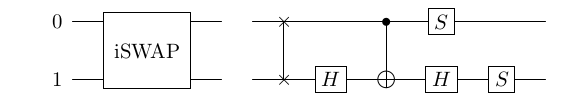

ISWAP decomposition to SWAP and CZ


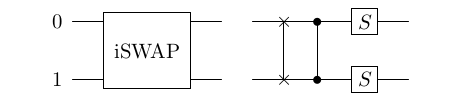

CNOT sandwich with X on control


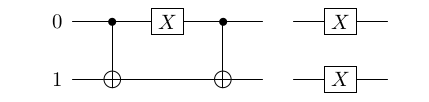

CNOT sandwich with Z on target


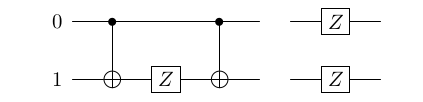

DCNOT (Double-CNOT) to iSWAP


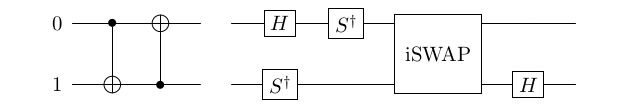

Commute X on CNOT target


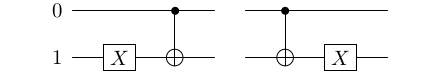

Commute X on CNOT control


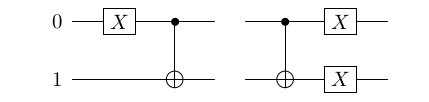

Commute Z on CNOT target


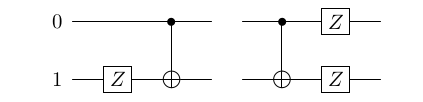

Commute Z on CNOT control


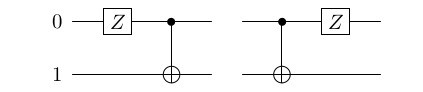

Canonical gates: CZ to ZZ


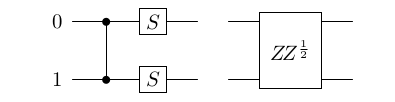

Canonical gates: XX to ZZ


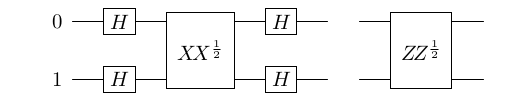

Canonical gates: CNOT to XX


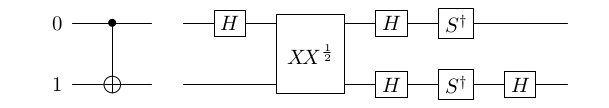

Canonical gates: SWAP to Canonical


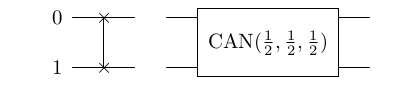

ISWAP to Canonical


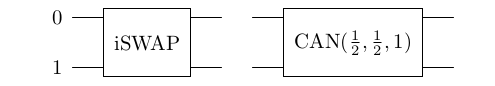

ISWAP to Canonical in Weyl chamber


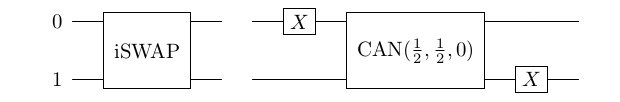

DCNOT to Canonical


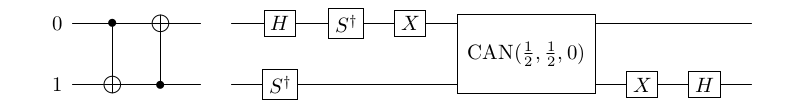

CNOT controls commute


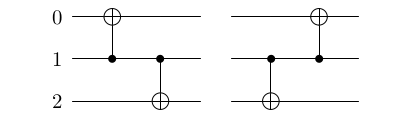

CNOT targets commute


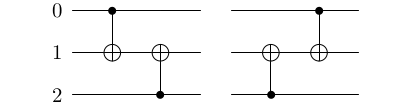

Commutation of CNOT target/control


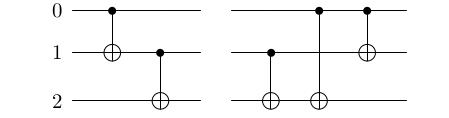

Indirect CNOT and 4 CNOTS with intermediate qubit


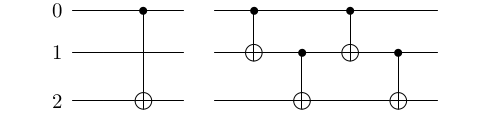

CZs with shared shared qubit commute


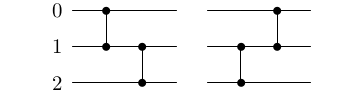

Toffoli gate CNOT decomposition


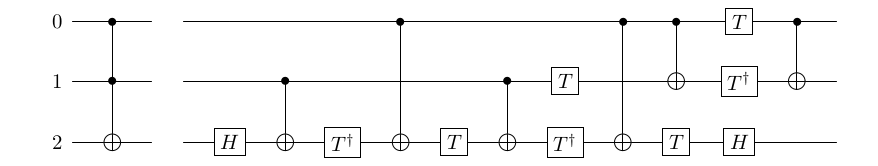

ZZ to CNOTs


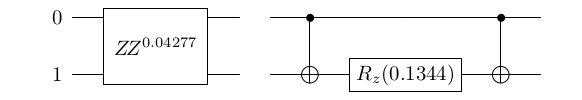

XX to CNOTs


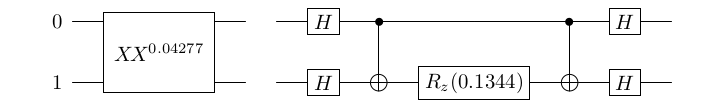

XX to CNOTs (2)


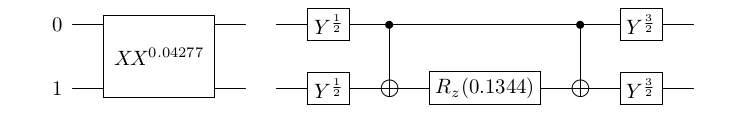

YY to CNOTs


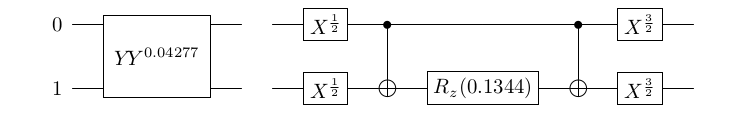

In [8]:
from examples import circuit_identities
def compare_circuits(circ0, circ1):
    assert qf.gates_close(circ0.asgate(), circ1.asgate()) # Double check that identity is true
    qubits = (circ0 + circ1).qubits    # Gather qubits of both circuits
    circ = qf.Circuit()                # Create combined circuit with a gap
    circ += circ0
    circ += qf.I(*qubits)                    # Just show trailing wire
    circ += qf.visualization.NoWire(*qubits) # Add a gap in the circuit
    circ += circ1
    return qf.circuit_to_image(circ)

for description, circ0, circ1 in circuit_identities.identities()[:-4]:
    print(description)
    display(compare_circuits(circ0, circ1))